In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [6]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import PyPharmer as phr
import simplejson as json
from pprint import pprint

# Matplotlib options
%matplotlib inline
#mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 12

In [7]:
json_file1='../Test_Systems/Pharmacophores/Set02/ZINCpharmer.json'
json_file2='../Test_Systems/Pharmacophores/Set02/pharmit.json'
json_file3='../Test_Systems/Pharmacophores/Set01/gold_soln_l2199_3D_H_Ch_m1_4.json'

In [8]:
ph3=json.loads(open(json_file3).read())
ph2=json.loads(open(json_file2).read())
ph1=json.loads(open(json_file1).read())

In [12]:
tmp_json_keys = ph2.keys ()
tmp_json = ph2

In [13]:
tmp_json.get ('points')

[{'name': 'HydrogenAcceptor',
  'hasvec': True,
  'x': -3.185,
  'y': -14.222,
  'z': 18.329,
  'radius': 0.5,
  'enabled': True,
  'vector_on': 0,
  'svector': {'x': -0.4045084971874739,
   'y': -0.04251555625535759,
   'z': -0.9135454576426008},
  'minsize': '',
  'maxsize': '',
  'selected': False},
 {'name': 'HydrogenAcceptor',
  'hasvec': True,
  'x': -3.322,
  'y': -13.493,
  'z': 17.204,
  'radius': 0.5,
  'enabled': True,
  'vector_on': 0,
  'svector': {'x': -0.4810416756346445,
   'y': -0.3123921168015919,
   'z': -0.8191520442889917},
  'minsize': '',
  'maxsize': '',
  'selected': False},
 {'name': 'HydrogenAcceptor',
  'hasvec': True,
  'x': -0.221,
  'y': -12.367,
  'z': 18.577,
  'radius': 0.5,
  'enabled': True,
  'vector_on': 0,
  'svector': {'x': -0.20173582504328802,
   'y': 0.9490924366591315,
   'z': 0.2419218955996679},
  'minsize': '',
  'maxsize': '',
  'selected': False},
 {'name': 'HydrogenAcceptor',
  'hasvec': True,
  'x': 1.328,
  'y': -10.176,
  'z': 19.161

## Extracting descriptors and vectors

In [14]:
descriptors_list={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

if 'points' in tmp_json_keys:
    
                descriptors=[]
        
                for json_object in tmp_json.get ('points'):
                    
                
                    if json_object.get ('enabled')==True:
                        name=descriptors_list[json_object.get ('name')]
                        vector=json_object.get ('vector')
                        vector_on=json_object.get ('vector_on')
                        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==1:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                        element['x'], element['y'],element['z']])
                                
                            if vector_on ==0:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                            
                            descriptors.append (descriptor)
                           
                        if 'vector' and not 'vector_on' in json_object.keys ():
                            
                            if vector!=None:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                element['x'], element['y'],element['z']])
                            
                                
                            if vector==None:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                
                            descriptors.append (descriptor)
                                
                points=np.array (descriptors)
                pprint (points)

array([[  2.   ,  -3.185, -14.222,  18.329,   0.   ,   0.   ,   0.   ],
       [  2.   ,  -3.322, -13.493,  17.204,   0.   ,   0.   ,   0.   ],
       [  2.   ,  -0.221, -12.367,  18.577,   0.   ,   0.   ,   0.   ],
       [  2.   ,   1.328, -10.176,  19.161,   0.   ,   0.   ,   0.   ],
       [  2.   ,   3.464, -10.507,  19.754,   0.   ,   0.   ,   0.   ],
       [  1.   ,  -4.172, -15.224,  18.653,   0.   ,   0.   ,   0.   ]])


## Extracting descriptors and svectors 
(mistake; we need vectors)

descriptors={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

descriptors=[]
for point in ph2.get ('points'):
    if point.get ('enabled')==False:
        if 'svector' in point.keys ():
            svector=point.get ('svector')
            if svector!=None:
                name=descriptors[point.get('name')]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'), 
                    svector.get('x'),svector.get('y'),svector.get('z')])
            if svector== None:
                svector=[0]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'),
                    svector[0],svector[0],svector[0]])

## Testing the library

In [15]:
data=phr.Descriptors (input_file=json_file2,select='enabled')

In [16]:
data.points

array([[  2.   ,  -3.185, -14.222,  18.329,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  2.   ,  -3.322, -13.493,  17.204,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  2.   ,  -0.221, -12.367,  18.577,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  2.   ,   1.328, -10.176,  19.161,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  2.   ,   3.464, -10.507,  19.754,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  1.   ,  -4.172, -15.224,  18.653,   1.   ,   0.   ,   0.   ,   0.   ]])

<IPython.core.display.Javascript object>


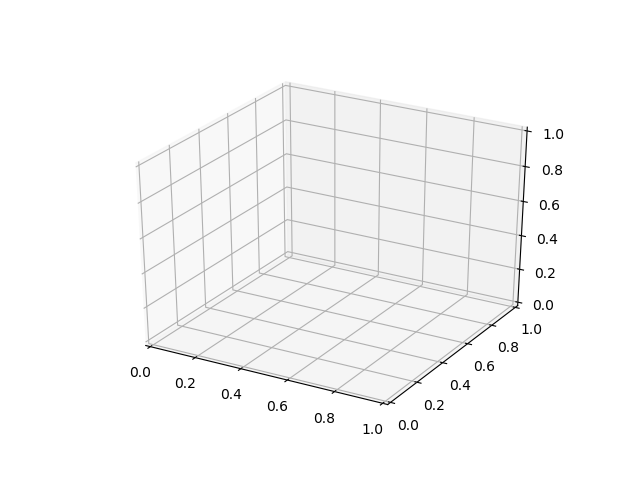

NameError: name 'Hyd' is not defined

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Hyd[0],Hyd[1],Hyd[2], color=[0.100, 1.000, 0.000])
ax.scatter(HA[0],HA[1],HA[2], color='orange')
ax.scatter(HD[0],HD[1],HD[2], color='black')
ax.scatter(Ar[0],Ar[1],Ar[2], color='purple')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [18]:
cliques=nx.Graph ()
cliques.add_nodes_from (Hyd[0-3])

NameError: name 'Hyd' is not defined

In [ ]:
print (Hyd[0-3])

## Multiple files

In [20]:
template = '/home/angel/Dropbox/Doctorado/Experimentos/Pharmacophore_model_pharmer/pharmacophore_files/%s.json'
flist = [template % str(i) for i in range(1,61)]

In [21]:
Hydrophobic         = [[],[],[]]
HydrogenAcceptor    = [[],[],[]]
HydrogenDonor       = [[],[],[]]
Aromatic            = [[],[],[]]
NegativeIon         = [[],[],[]]
PositiveIon         = [[],[],[]]
InclusionSphere     = [[],[],[]]
Other               = [[],[],[]]
PhenylalanineAnalog = [[],[],[]]
LeuValAnalog        = [[],[],[]]
    
for i in flist:
    data=phr.Descriptors (input_file=i,select='all')
    
    for element in data.points:
        if element[0]==1.0:
            Hydrophobic[0].append (element[1])
            Hydrophobic[1].append (element[2])
            Hydrophobic[2].append (element[3])
        if element[0]==2.0:
            HydrogenAcceptor[0].append (element[1])
            HydrogenAcceptor[1].append (element[2])
            HydrogenAcceptor[2].append (element[3])
        if element[0]==3.0:
            HydrogenDonor[0].append (element[1])
            HydrogenDonor[1].append (element[2])
            HydrogenDonor[2].append (element[3])
        if element[0]==4.0:
            Aromatic[0].append (element[1])
            Aromatic[1].append (element[2])
            Aromatic[2].append (element[3])
        if element[0]==4.0:
            NegativeIon[0].append (element[1])
            NegativeIon[1].append (element[2])
            NegativeIon[2].append (element[3])
        if element[0]==5.0:
            PositiveIon[0].append (element[1])
            PositiveIon[1].append (element[2])
            PositiveIon[2].append (element[3])
        if element[0]==6.0:
            Other[0].append (element[1])
            Other[1].append (element[2])
            Other[2].append (element[3])
        if element[0]==7.0:
            PhenylalanineAnalog[0].append (element[1])
            PhenylalanineAnalog[1].append (element[2])
            PhenylalanineAnalog[2].append (element[3])
        if element[0]==8.0:
            LeuValAnalog[0].append (element[1])
            LeuValAnalog[1].append (element[2])
            LeuValAnalog[2].append (element[3])

<IPython.core.display.Javascript object>


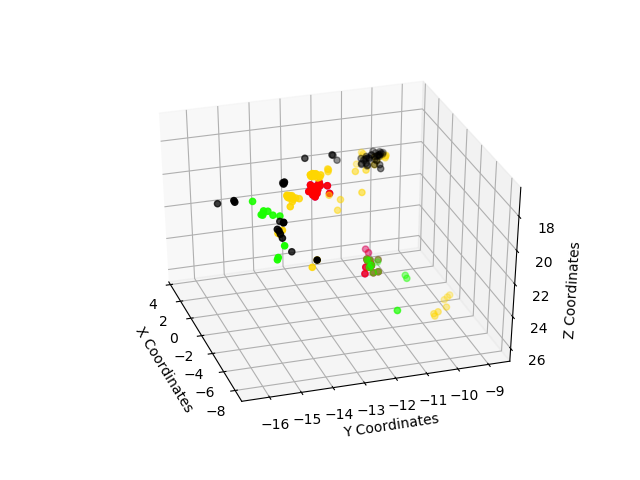

In [22]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(Hydrophobic[0],Hydrophobic[1],Hydrophobic[2], color=[0.100, 1.000, 0.000])
ax.scatter(HydrogenAcceptor[0],HydrogenAcceptor[1],HydrogenAcceptor[2], color=[1.000, 0.84, 0.000])
ax.scatter(HydrogenDonor[0],HydrogenDonor[1],HydrogenDonor[2], color='black') #[1.000, 1.000, 1.000]
ax.scatter(Aromatic[0],Aromatic[1],Aromatic[2], color=[0.627, 0.1254, 0.941])
ax.scatter(NegativeIon[0],NegativeIon[1],NegativeIon[2], color=[1.00, 0.00, 0.00])
ax.scatter(PositiveIon[0],PositiveIon[1],PositiveIon[2], color=[0.00, 0.00, 1.00])
ax.scatter(Other[0],Other[1],Other[2], color=[0.74, 0.74, 0.74])
ax.scatter(PhenylalanineAnalog[0],PhenylalanineAnalog[1],PhenylalanineAnalog[2], color=[1.0, 1.0, 0.0])
ax.scatter(LeuValAnalog[0],LeuValAnalog[1],LeuValAnalog[2], color=[1.0, 1.0, 0.0])
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')
plt.show()